# Проект: вариант 3
### Представьте, что вы работаете в крупном дейтинговом приложении.
### Помимо базовых функций, в приложении также имеется премиум-подписка, которая дает доступ к ряду важных дополнительных возможностей. Был проведен A/B тест, в рамках которого для новых пользователей из нескольких стран была изменена стоимость премиум-подписки при покупке через две новые платежные системы. При этом стоимость пробного периода оставалась прежней.

## Проверьте:

* Был ли эксперимент успешен в целом.
* Проанализируйте, имеет ли нововведение смысл среди каких-либо конкретных групп пользователей.

Деньги за подписку списываются ежемесячно до тех пор, пока пользователь её не отменит.

______
## Данные
Всего есть три группы: тестовая (test), контрольная 1 (control_1) и контрольная 2 (control_2). Для каждой из них:

### users_*.csv – информация о пользователях:

* uid – идентификатор пользователя
* age – возраст
* attraction_coeff – коэффициент привлекательности (от 0 до 1000, \frac{лайки}{просмотры}*1000 
просмотры
лайки∗1000)
* coins – число монеток (внутренняя валюта)
* country – страна  
* visit_days – в какие дни после регистрации пользователь посещал приложение (напр. в 1, затем в 7)
* gender – пол
* age_filter_start  – фильтр поиска, мин. значение 
* age_filter_end  – фильтр поиска, макс. значение 
* views_count – число полученных оценок 
* was_premium – был ли когда-либо премиум (либо пробный период премиум-статуса, либо купленный за деньги)
* is_premium –  является ли премиум
* total_revenue – нормированная выручка

### transactions_*.csv – информация о платежах пользователей:

* uid – идентификатор пользователя
* country – страна
* joined_at – дата и время регистрации
* paid_at – дата и время покупки
* revenue – нормированная выручка
* payment_id – идентификатор платежа
* from_page – откуда пользователь перешел на страницу оплаты
* product_type – тип продукта (trial_premium – пробная премиум-подписка, premium_no_trial – премиум-подписка без пробной, coins – подписка за внутреннюю валюту, other_type – другое)

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

In [109]:
users_test = pd.read_csv('Проект_3_users_test.csv', sep = ';', error_bad_lines=False)
users_control_1 = pd.read_csv('Проект_3_users_control_1.csv', sep = ';', error_bad_lines=False)
users_control_2 = pd.read_csv('Проект_3_users_control_2.csv', sep = ';', error_bad_lines=False)
transactions_test = pd.read_csv('Проект_3_transactions_test.csv', sep = ';', error_bad_lines=False)
transactions_control_1 = pd.read_csv('Проект_3_transactions_control_1.csv', sep = ';', error_bad_lines=False)
transactions_control_2 = pd.read_csv('Проект_3_transactions_control_2.csv', sep = ';', error_bad_lines=False)


Import data 

## EDA(exploratory data analysis)

In [4]:
print(users_test.info())
print(users_control_1.info())
print(users_control_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uid               4308 non-null   int64  
 1   age               4308 non-null   int64  
 2   attraction_coeff  4308 non-null   int64  
 3   coins             49 non-null     float64
 4   country           4308 non-null   object 
 5   visit_days        2978 non-null   object 
 6   gender            4308 non-null   int64  
 7   age_filter_start  4308 non-null   int64  
 8   age_filter_end    4308 non-null   int64  
 9   views_count       4308 non-null   int64  
 10  was_premium       408 non-null    float64
 11  is_premium        157 non-null    float64
 12  total_revenue     4308 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 437.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 13 columns):
 #   Column 

In [5]:
users_test.head(3)

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue
0,892309896,27,685,NaN,United States of America,"1,2,3,4,5,6,7,8,9,10,11,12,16,17",1,24,30,89,NaN,NaN,0
1,892044516,27,0,NaN,Germany,NaN,1,24,30,0,NaN,NaN,0
2,892185708,45,44,NaN,Israel,"1,3,4,6,7,8,10,11,12,13,14,15,16,17,18,19,20,2...",1,42,48,68,NaN,NaN,0


Много null значений в coins, was_premium, is_premium (можем заменить на 0) и visit_days (сделаем колонку с разбивкой по кол-ву дней)

In [6]:
print(transactions_test.info())
print(transactions_control_1.info())
print(transactions_control_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   uid           273 non-null    int64 
 1   country       273 non-null    object
 2   joined_at     273 non-null    object
 3   paid_at       273 non-null    object
 4   revenue       273 non-null    int64 
 5   payment_id    273 non-null    int64 
 6   from_page     273 non-null    object
 7   product_type  273 non-null    object
dtypes: int64(3), object(5)
memory usage: 17.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uid           377 non-null    float64
 1   country       377 non-null    object 
 2   joined_at     1007 non-null   object 
 3   paid_at       1007 non-null   object 
 4   revenue       377 non-null    float64
 5   payment_

- transactions_control_1 - под вопросом(joined_at, paid_at - 1007 значний,в остальных 377. Судя по другим двум датафреймам у нас какой-то сбой в этом df) 
- Проверим данные по времени

In [7]:
print(transactions_test.joined_at.min())
print(transactions_test.joined_at.max())
print(transactions_test.paid_at.min())
print(transactions_test.paid_at.max())


2017-01-11 03:07:00
2017-10-31 23:40:00
2017-01-11 04:37:00
2017-12-11 22:06:00


In [8]:
print(transactions_control_1.joined_at.min())
print(transactions_control_1.joined_at.max())
print(transactions_control_1.paid_at.min())
print(transactions_control_1.paid_at.max())
transactions_control_1.tail(5)

2015-01-19 11:49:00
NaT
2016-12-14 16:16:00
NaT


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
1002,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1003,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1004,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1005,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN
1006,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN


In [9]:
print(transactions_control_2.joined_at.min())
print(transactions_control_2.joined_at.max())
print(transactions_control_2.paid_at.min())
print(transactions_control_2.paid_at.max())


2017-01-11 08:36:00
2017-10-31 17:43:00
2017-01-11 05:34:00
2017-12-11 23:28:00


Да, transactions_control_1 проблема с данными, нужно почистить
* Убираем NaN 
* Отрежем данные до 2017г, тк в других данных их нету и они нас не интересуют

In [10]:
transactions_control_1 = transactions_control_1.dropna()
transactions_control_1.shape

(377, 8)

In [11]:
transactions_control_1.sort_values(by=['joined_at'])

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
224,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 16:16:00,143.0,0.0,refund_WP,other_type
65,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:30:00,26.0,0.0,refund_VP,other_type
101,960936960.0,Russian Federation,2015-01-19 11:49:00,2016-12-14 17:35:00,637.0,0.0,refung_AP,other_type
368,891561825.0,France,2017-01-11 01:06:00,2017-04-11 23:21:00,3900.0,19.0,empty_likes,coins
196,891561825.0,France,2017-01-11 01:06:00,2017-08-11 03:06:00,12636.0,147.0,trial_vip_popup,trial_premium
...,...,...,...,...,...,...,...,...
363,891607515.0,Spain,2017-10-31 03:34:00,2017-11-13 15:26:00,6305.0,19.0,menu,coins
332,891607515.0,Spain,2017-10-31 03:34:00,2017-11-13 15:07:00,6292.0,147.0,popular_users_block,premium_no_trial
161,891583611.0,Spain,2017-10-31 16:30:00,2017-07-11 19:13:00,16536.0,147.0,none,trial_premium
293,891580347.0,United States of America,2017-10-31 17:51:00,2017-07-11 19:51:00,13468.0,147.0,trial_vip_popup,trial_premium


In [12]:
transactions_control_1 = transactions_control_1.loc[transactions_control_1["joined_at"] >='2016-12-30' ]
transactions_control_1.sort_values(by=['joined_at'])

,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
196,891561825.0,France,2017-01-11 01:06:00,2017-08-11 03:06:00,12636.0,147.0,trial_vip_popup,trial_premium
368,891561825.0,France,2017-01-11 01:06:00,2017-04-11 23:21:00,3900.0,19.0,empty_likes,coins
342,891561825.0,France,2017-01-11 01:06:00,2017-01-11 13:33:00,3913.0,146.0,empty_likes,coins
372,891556971.0,France,2017-01-11 05:07:00,2017-01-11 05:16:00,2886.0,68.0,none,premium_no_trial
167,891553362.0,United States of America,2017-01-11 08:26:00,2017-08-11 10:38:00,12727.0,147.0,autoreply_message,trial_premium
...,...,...,...,...,...,...,...,...
332,891607515.0,Spain,2017-10-31 03:34:00,2017-11-13 15:07:00,6292.0,147.0,popular_users_block,premium_no_trial
363,891607515.0,Spain,2017-10-31 03:34:00,2017-11-13 15:26:00,6305.0,19.0,menu,coins
161,891583611.0,Spain,2017-10-31 16:30:00,2017-07-11 19:13:00,16536.0,147.0,none,trial_premium
293,891580347.0,United States of America,2017-10-31 17:51:00,2017-07-11 19:51:00,13468.0,147.0,trial_vip_popup,trial_premium


#### Займемся преобразованием данных
* Объединим колонки с контрольными группами
* Создадим доп колонку с кол-вом дней захода на платформу (tot_days)

In [13]:
# объединяеи и проверяем нормально ли прошло объединение
users_control = pd.concat([users_control_1, users_control_2], axis = 0)
print(users_control.uid.nunique())
print(users_control.shape)

8604
(8604, 13)


In [14]:
print(users_test.uid.nunique())
print(users_test.shape)


4308
(4308, 13)


In [15]:
# создаем колонки с группой пользователя и объединяем все данные по юзерам
users_control['group'] = 'control'
users_test['group'] = 'test'
users = pd.concat([users_control, users_test], axis = 0)
print(users.uid.nunique())
print(users.shape)
users.head()

12912
(12912, 14)


,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group
0,892319115,25,435,NaN,United States of America,"1,2,3,4,5,6",0,22,32,982,NaN,NaN,0,control
1,891248523,29,500,NaN,United States of America,"1,2",1,26,32,12,NaN,NaN,0,control
2,891670932,33,800,NaN,France,"1,2,3,5,6,8,9,11,13,16",1,30,36,5,NaN,NaN,0,control
3,891060786,26,0,NaN,Argentina,"1,2,3,4,5",1,23,29,0,NaN,NaN,0,control
4,892006554,35,294,NaN,United States of America,"1,2,3,5,6,7,8,9,10,12,15,16,17,19",1,30,40,17,NaN,NaN,0,control


In [16]:
users.dtypes

uid                   int64
age                   int64
attraction_coeff      int64
coins               float64
country              object
visit_days           object
gender                int64
age_filter_start      int64
age_filter_end        int64
views_count           int64
was_premium         float64
is_premium          float64
total_revenue         int64
group                object
dtype: object

In [17]:
# создаем колонку с кол-вом дней на платформе
users.visit_days = users.visit_days.replace({',' : ''},regex=True)
users['tot_days'] = users.visit_days.str.len() 
users.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,tot_days
0,892319115,25,435,NaN,United States of America,123456,0,22,32,982,NaN,NaN,0,control,6.0
1,891248523,29,500,NaN,United States of America,12,1,26,32,12,NaN,NaN,0,control,2.0
2,891670932,33,800,NaN,France,1235689111316,1,30,36,5,NaN,NaN,0,control,13.0
3,891060786,26,0,NaN,Argentina,12345,1,23,29,0,NaN,NaN,0,control,5.0
4,892006554,35,294,NaN,United States of America,12356789101215161719,1,30,40,17,NaN,NaN,0,control,20.0


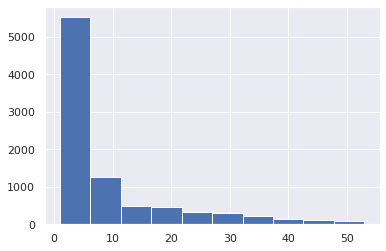

In [18]:
users.tot_days.hist()

Проверим юзеров по возрасту

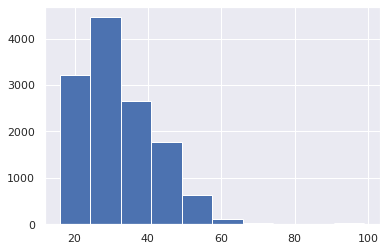

In [19]:
users.age.hist()

In [20]:
users.query('age > 80').age.value_counts()

99    16
98     2
92     1
91     1
90     1
87     1
83     1
Name: age, dtype: int64

Есть 16 человек с возрастом 99 лет, а вот 80-98 всего 7. Посмотрим поближе чтобы решить что с ними делать

In [21]:
users.query('age > 98')

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,tot_days
773,891746646,99,300,NaN,Italy,NaN,1,50,70,10,NaN,NaN,0,control,NaN
1466,891918399,99,62,NaN,Italy,123,1,50,99,16,NaN,NaN,0,control,3.0
1856,891374112,99,900,NaN,United Arab Emirates,1234567891011,1,16,99,462,NaN,NaN,0,control,13.0
2103,892185039,99,759,NaN,United Kingdom (Great Britain),123456789,1,43,49,79,1.0,1.0,7332,control,9.0
2238,892321845,99,500,NaN,United States of America,NaN,1,22,99,4,NaN,NaN,0,control,NaN
2312,891682545,99,0,NaN,United States of America,NaN,1,96,102,0,NaN,NaN,0,control,NaN
2836,891900387,99,333,NaN,Italy,134,1,16,99,3,NaN,NaN,0,control,3.0
1100,891995541,99,213,NaN,Ukraine,123456789101112131415161718192021,1,18,99,197,1.0,1.0,8879,control,33.0
2571,891559305,99,440,NaN,Germany,12,0,24,37,25,NaN,NaN,0,control,2.0
1747,892285575,99,166,NaN,Germany,123456789101112131516171819202122232425,1,50,70,6,NaN,NaN,0,test,39.0


Ничего необычного, кроме их возраста. Я допускаю что им 99 лет, но смущает их количествнная разница с 80-98 лет. Оставим, тк их не особо много и нету прямой причины удалять

Чтобы проще было оценивать возраст создаем колонку с корзинами по возрасту

In [22]:
users['age_bin'] = np.nan
for i in range(8,0,-1):
    users.loc[users['age'] <= i*10, 'age_bin'] = i

print(users[['age' , 'age_bin']].head(10))
print(users.age_bin.value_counts())

   age  age_bin
0   25      3.0
1   29      3.0
2   33      4.0
3   26      3.0
4   35      4.0
5   28      3.0
6   20      2.0
7   25      3.0
8   38      4.0
9   49      5.0
3.0    5562
4.0    3612
5.0    1875
2.0    1167
6.0     627
7.0      35
8.0      11
Name: age_bin, dtype: int64


Заменим NaN на 0, для упрощения работы

In [23]:
users = users.fillna(0)
users.head()

,uid,age,attraction_coeff,coins,country,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,tot_days,age_bin
0,892319115,25,435,0.0,United States of America,123456,0,22,32,982,0.0,0.0,0,control,6.0,3.0
1,891248523,29,500,0.0,United States of America,12,1,26,32,12,0.0,0.0,0,control,2.0,3.0
2,891670932,33,800,0.0,France,1235689111316,1,30,36,5,0.0,0.0,0,control,13.0,4.0
3,891060786,26,0,0.0,Argentina,12345,1,23,29,0,0.0,0.0,0,control,5.0,3.0
4,892006554,35,294,0.0,United States of America,12356789101215161719,1,30,40,17,0.0,0.0,0,control,20.0,4.0


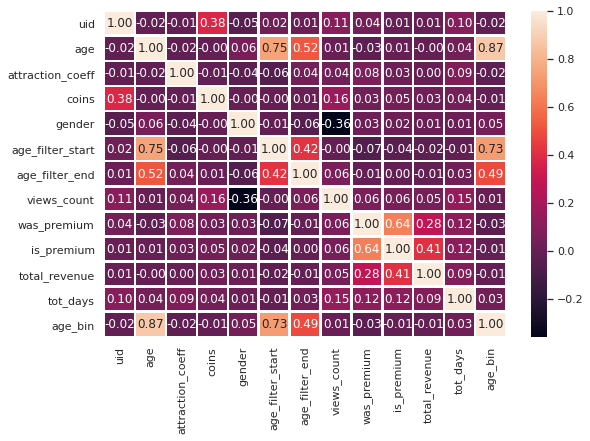

In [24]:
corr = users.corr()

f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)
plt.show()

Никаких интересных сильных корелляций (возраст и связанные с ним колонки и ревенью с премиум)

Используем pandas-profiling чтобы изучить все данные сразу

In [25]:
#pip install pandas-profiling 


In [26]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(users, title = 'Pandas Profiling Report')
#profile

### Выводы
* control group больше чем test group в 2 раза
* 31% пользователей провел на платформе 0 дней
* Q3 пользователей провело до 7 дней
* Пользователи из USA - 34% всех пользователей
* was premium - 9,7% пользователей
* is_premium - 4,2%
* 95% пользователей - мужчины
* 95% revenue пользователей - 0
* медианный возраст - 30 лет
* 95% пользователей в возрасте до 51 года
* 99летних пользователей больше чем 76-98 вместе взятых

### Сделаем то же самое и с тразнзакциями

In [27]:
transactions_control = pd.concat([transactions_control_1,transactions_control_2], axis = 0)
print(transactions_control.uid.nunique())
print(transactions_control.shape)
transactions_control.head()

379
(702, 8)


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins


In [28]:
transactions_control['group'] = 'control'
transactions_test['group'] = 'test'
transactions = pd.concat([transactions_control, transactions_test], axis = 0)
print(transactions.uid.nunique())
print(transactions.shape)
transactions.head()

525
(975, 9)


,uid,country,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,891319275.0,France,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium,control
1,892421826.0,Israel,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium,control
2,891822480.0,Italy,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins,control
3,891367521.0,Italy,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type,control
4,892207959.0,France,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins,control


In [29]:
#profile_trans = ProfileReport(transactions, title = 'Transactions Profiling Report')
#profile_trans

### Выводы
* 53.8% уникальных uid = 53.8% пользователей сделали одну оплату
* 31% транзакций из USA
* медианный платеж - 5804.5
* max платеж - 113477
* в 95% платежей попадают суммы до 16471
* 27% пользователей приходит из empty_likes, 15% из trial_vip_popup. на остальные виды переходов приходится < 10%
* самый популярный тип продука:
    * coins - 38,8%
    * premium_no_trial - 29,6%
    * trial_premium - 18,6%
    * other - 13,1%
* контрольная группа - 72%, тестовая - 28%

_____
## Проверим однородны ли наши А/Б users
* по странам
* по полу
* по возрасту
* по кол-ву дней проведенных на платформе

In [30]:
#проверим есть ли ошибки в uid и они находятся в обеих группах
a = users.groupby('uid')['group'].nunique().reset_index()
a[a['group']>1]

,uid,group


In [31]:
# группируем по группам и считаем соотношение по странам
country_group = users.groupby('group')['country'].value_counts(normalize=True).to_frame('percent')
country_group.sort_values(by=['percent'], ascending=False).head(20)

percent
group   country                                 
control United States of America        0.343677
test    United States of America        0.336583
        Argentina                       0.091922
control Argentina                       0.091353
        France                          0.086704
test    France                          0.083333
control Spain                           0.075779
test    Italy                           0.074977
control Italy                           0.073338
test    Spain                           0.069870
control Chile                           0.066597
test    Chile                           0.063138
        United Arab Emirates            0.052461
control United Arab Emirates            0.048582
test    Germany                         0.048514
control Germany                         0.045328
test    United Kingdom (Great Britain)  0.039229
control United Kingdom (Great Britain)  0.033938
test    Canada                          0.031801
control Canada                          0.031148

Группы однородны по странам

In [32]:
gender_comparison = users.groupby('group')['gender'].value_counts(normalize=True).to_frame('percent')
gender_comparison

percent
group   gender          
control 1       0.956183
        0       0.043817
test    1       0.953110
        0       0.046890

In [33]:
age_comparison = users.groupby('group')['age_bin'].value_counts(normalize=True).to_frame('percent')
age_comparison

percent
group   age_bin          
control 3.0      0.428638
        4.0      0.280916
        5.0      0.147257
        2.0      0.089028
        6.0      0.049279
        7.0      0.002325
        0.0      0.001627
        8.0      0.000930
test    3.0      0.435005
        4.0      0.277391
        5.0      0.141133
        2.0      0.093083
        6.0      0.047122
        7.0      0.003482
        0.0      0.002089
        8.0      0.000696

In [34]:
days_comparison = users.groupby('group')['tot_days'].value_counts(normalize=True).to_frame('percent')
days_comparison.sort_values(by = ('percent'), ascending=False)

percent
group   tot_days          
control 0.0       0.312413
test    0.0       0.308728
control 1.0       0.160274
test    1.0       0.147168
        2.0       0.090761
...                    ...
control 48.0      0.000465
test    46.0      0.000464
control 50.0      0.000349
test    52.0      0.000232
control 46.0      0.000116

[107 rows x 1 columns]

Группы однородны по возрасту, гендеру и кол-ву дней на платформе

Также построим графики 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


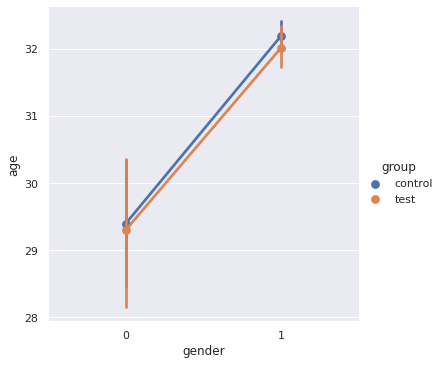

In [35]:
# корреляция возраста и пола
sns.catplot('gender','age',hue='group',kind='point',data = users)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


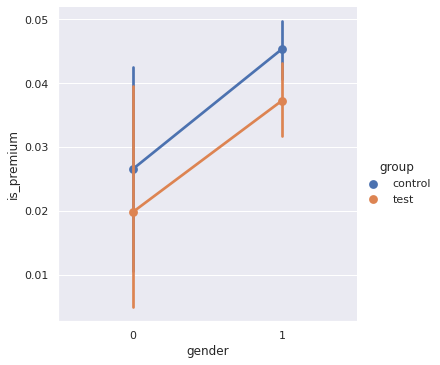

In [36]:
# корреляция пола и премиум подписки
sns.catplot('gender','is_premium',hue='group',kind='point',data = users)

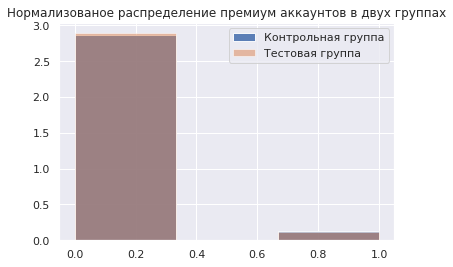

In [37]:
#смортим нормализованое распределение премиум аккаунтов
fix, ax = plt.subplots() 
ax.hist(users.query('group == "control"')['is_premium'], \
        label = 'Контрольная группа', alpha = 0.9, bins = 3, density=True) #step - thin lines
ax.hist(users.query('group == "test"')['is_premium'], \
        label = 'Тестовая группа', alpha = 0.5, bins = 3, density=True)
ax.set_title('Нормализованое распределение премиум аккаунтов в двух группах')
ax.legend()
plt.show()

Ничего необычного не замечено

In [38]:
# считаем уникальные страны по двум группам
print(users.query('group == "test"').country.nunique())
print(users.query('group == "control"').country.nunique())

51
58


Есть различия в странах, для корректного теста нужно выровнять группы

In [39]:
# создаем датафреймы со странами с группировкой по группам
test_countries = users.query('group == "test"').country.value_counts()\
    .to_frame().reset_index().rename(columns={'index': 'country', 'country': 'num'})
control_countries = users.query('group == "control"').country.value_counts()\
    .to_frame().reset_index().rename(columns={'index': 'country', 'country': 'num'})
# присваиваем им колонки для различия
test_countries['test'] = 'test'
control_countries['test'] = 'control'
# соединяем в один датафрейм, убираем повторения и остаются только лишние для каждой группы страны
# преобразуем их в список индексов для удаления из основного датафрейма
test_countries_diff = pd.concat([control_countries, test_countries])\
                        .drop_duplicates(subset='country',keep=False)\
                        .set_index('country').index
# сет индекс на страны для удаления
users = users.set_index('country')
# удаляем 'ненужные' страны
users = users.drop(test_countries_diff)
# возвращаем индекс на место
users = users.reset_index()
users

,country,uid,age,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,was_premium,is_premium,total_revenue,group,tot_days,age_bin
0,United States of America,892319115,25,435,0.0,123456,0,22,32,982,0.0,0.0,0,control,6.0,3.0
1,United States of America,891248523,29,500,0.0,12,1,26,32,12,0.0,0.0,0,control,2.0,3.0
2,France,891670932,33,800,0.0,1235689111316,1,30,36,5,0.0,0.0,0,control,13.0,4.0
3,Argentina,891060786,26,0,0.0,12345,1,23,29,0,0.0,0.0,0,control,5.0,3.0
4,United States of America,892006554,35,294,0.0,12356789101215161719,1,30,40,17,0.0,0.0,0,control,20.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12864,United States of America,891078639,17,895,0.0,12345,1,16,20,96,0.0,0.0,0,test,5.0,2.0
12865,United States of America,891188733,27,866,0.0,123,1,18,41,30,0.0,0.0,0,test,3.0,3.0
12866,Argentina,891293718,48,0,0.0,0,1,47,51,10,0.0,0.0,0,test,0.0,5.0
12867,Australia,891192357,32,0,0.0,0,1,16,49,0,0.0,0.0,0,test,0.0,4.0


In [40]:
print(users.query('group == "control"').country.nunique())
print(users.query('group == "test"').country.nunique())

37
37


Теперь все поровну, "лишних" стран оказалось больше чем показалось сразу

In [44]:
users.query('group == "test"').country.value_counts(normalize = True).nlargest(5)

United States of America    0.337995
Argentina                   0.092308
France                      0.083683
Italy                       0.075291
Spain                       0.070163
Name: country, dtype: float64

In [43]:
users.query('group == "control"').country.value_counts(normalize = True).nlargest(5)
    

United States of America    0.344679
Argentina                   0.091619
France                      0.086957
Spain                       0.076000
Italy                       0.073552
Name: country, dtype: float64

По всем показателям группы максимально похожи.

Теперь изучим транзакции, но перед этим проверим на "лишние" страны и там

In [45]:
print(transactions.query('group == "control"').country.nunique())
print(transactions.query('group == "test"').country.nunique())


20
17


Та же история, поступим точно также как и с юзерами. Лишние страны могут помешать нашему сравнению

In [46]:
# создаем датафреймы со странами с группировкой по группам
transactions_test_countries = transactions.query('group == "test"').country.value_counts()\
    .to_frame().reset_index().rename(columns={'index': 'country', 'country': 'num'})
transactions_control_countries = transactions.query('group == "control"').country.value_counts()\
    .to_frame().reset_index().rename(columns={'index': 'country', 'country': 'num'})
# присваиваем им колонки для различия
transactions_test_countries['test'] = 'test'
transactions_control_countries['test'] = 'control'
# соединяем в один датафрейм, убираем повторения и остаются только лишние для каждой группы страны
# преобразуем их в список индексов для удаления из основного датафрейма
transactions_countries_diff = pd.concat([transactions_test_countries, transactions_control_countries])\
                        .drop_duplicates(subset='country',keep=False)\
                        .set_index('country').index
# сет индекс на страны для удаления
transactions = transactions.set_index('country')
# удаляем 'ненужные' страны
transactions = transactions.drop(transactions_countries_diff)
# возвращаем индекс на место
transactions = transactions.reset_index()
transactions

,country,uid,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
0,France,891319275.0,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium,control
1,Israel,892421826.0,2017-10-14 12:46:00,2017-10-23 12:54:00,14586.0,147.0,trial_vip_popup,trial_premium,control
2,Italy,891822480.0,2017-10-26 22:27:00,2017-12-11 20:59:00,1911.0,19.0,none,coins,control
3,Italy,891367521.0,2017-05-11 02:37:00,2017-06-11 19:15:00,1456.0,127.0,sympathy,other_type,control
4,France,892207959.0,2017-10-18 18:30:00,2017-12-11 12:03:00,1261.0,19.0,empty_likes,coins,control
...,...,...,...,...,...,...,...,...,...
940,Israel,891419625.0,2017-04-11 05:58:00,2017-11-11 08:33:00,14352.0,147.0,trial_vip_popup,trial_premium,test
941,United Kingdom (Great Britain),891447105.0,2017-03-11 17:05:00,2017-11-11 04:23:00,7319.0,147.0,fans,premium_no_trial,test
942,United States of America,891497073.0,2017-02-11 15:33:00,2017-05-11 04:06:00,2730.0,67.0,empty_likes,other_type,test
943,Israel,891406224.0,2017-04-11 12:56:00,2017-04-11 13:35:00,2743.0,67.0,empty_likes,other_type,test


In [47]:
print(transactions.query('group == "control"').country.nunique())
print(transactions.query('group == "test"').country.nunique())


15
15


Построим график и посмотрим распределение платежей по группам

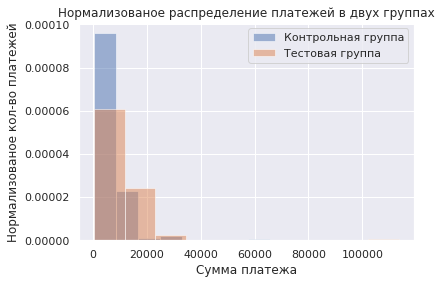

In [48]:
#смортим распределение платежей 
fix, ax = plt.subplots() 
ax.hist(transactions.query('group == "control"')['revenue'], \
        label = 'Контрольная группа', alpha = 0.5, density=True) #step - thin lines
ax.hist(transactions.query('group == "test"')['revenue'], \
        label = 'Тестовая группа', alpha = 0.5, density=True)
ax.set_title('Нормализованое распределение платежей в двух группах')
ax.set_ylabel('Нормализованое кол-во платежей')
ax.set_xlabel('Сумма платежа')
ax.legend()
plt.show()

Виден очень длинных хвост, значит есть некоторое кол-во платежей на большие суммы

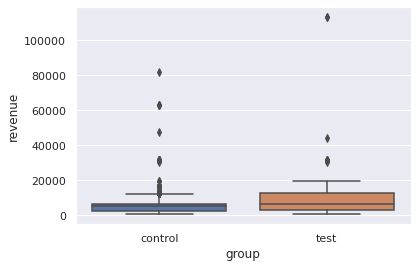

In [49]:
sns.boxplot(x = 'group', y = 'revenue', data = transactions)

На боксплоте видно нагляднее, посмотрим на распределение без этих выбросов. Построим графики до 20к ('усы' боксплота)

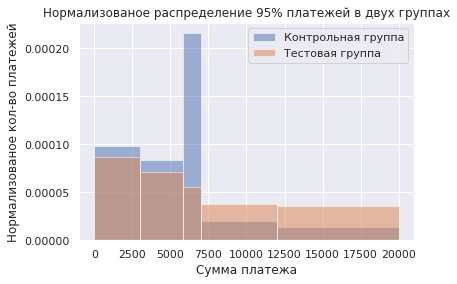

In [50]:
#смортим распределение платежей , для более понятного графика отрежем хвост в верхние 5%
fix, ax = plt.subplots() 
ax.hist(transactions.query('group == "control"')['revenue'], \
        label = 'Контрольная группа', alpha = 0.5, bins = [0, 3000,5800, 7000, 12000, 20000], density=True) #step - thin lines
ax.hist(transactions.query('group == "test"')['revenue'], \
        label = 'Тестовая группа', alpha = 0.5, bins = [0, 3000,5800, 7000, 12000, 20000], density=True)
ax.set_title('Нормализованое распределение 95% платежей в двух группах')
ax.set_ylabel('Нормализованое кол-во платежей')
ax.set_xlabel('Сумма платежа')
ax.legend()
plt.show()

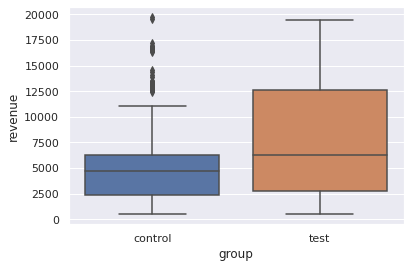

In [51]:
transactions_box = transactions.query('revenue < 20000')
sns.boxplot(x = 'group', y = 'revenue', data = transactions_box)

* Есть пик в районе 6к у контр группы
* Тестовая группа платит больше выше 50 процентиля

In [52]:
transactions.query('group == "control"')['revenue'].value_counts()

6292.0     81
1261.0     77
6305.0     63
3783.0     45
9087.0     25
           ..
12766.0     1
2873.0      1
2587.0      1
16614.0     1
1586.0      1
Name: revenue, Length: 193, dtype: int64

Изучим этот пик платежей в разрезе 'product_type' и 'from_page'

In [53]:
peak_transactions_control = \
transactions.query('group == "control" and revenue == 6292 or group == "control" and revenue == 6305')
peak_transactions_control = peak_transactions_control.groupby(['country', 'product_type','from_page']) \
                                                    ['revenue'].count().to_frame()
peak_transactions_control.revenue.nlargest(5)

country                         product_type      from_page        
United States of America        coins             empty_likes          14
United Kingdom (Great Britain)  coins             autorefill           10
United States of America        premium_no_trial  autoreply_message    10
Argentina                       coins             empty_likes           6
United Kingdom (Great Britain)  coins             empty_likes           6
Name: revenue, dtype: int64

Ничего необычного, но отметим что большая часть этих платежей - coins

Изучим описательную статистику транзакций

In [54]:
print(transactions.query('group == "control"')['revenue'].describe())
print(transactions.query('group == "test"')['revenue'].describe())

count      678.000000
mean      6512.194690
std       7500.664806
min        481.000000
25%       2424.500000
50%       5265.000000
75%       6431.750000
max      81796.000000
Name: revenue, dtype: float64
count       267.000000
mean       8721.295880
std       11210.509859
min         533.000000
25%        2925.000000
50%        6305.000000
75%       12597.000000
max      113477.000000
Name: revenue, dtype: float64


In [55]:
transactions.query('group == "control"')['revenue'].value_counts()

6292.0     81
1261.0     77
6305.0     63
3783.0     45
9087.0     25
           ..
12766.0     1
2873.0      1
2587.0      1
16614.0     1
1586.0      1
Name: revenue, Length: 193, dtype: int64

In [56]:
transactions.query('group == "test"')['revenue'].value_counts()

12727.0    17
12597.0    16
1261.0     10
3783.0      9
9100.0      9
           ..
7254.0      1
44083.0     1
12909.0     1
5330.0      1
13767.0     1
Name: revenue, Length: 122, dtype: int64

Тестовая платит больше в среднем, по медиане и особенно различие в 75 процентиле что мы и видели на боксплоте

In [57]:
#топ 10 платежей контрольной группы
transactions.query('group == "control"')['revenue'].nlargest(n=10)

414    81796.0
137    63037.0
269    63037.0
309    63037.0
389    63037.0
29     47723.0
61     31525.0
73     31525.0
131    31525.0
159    31525.0
Name: revenue, dtype: float64

In [58]:
#топ 10 платежей тестовой группы
transactions.query('group == "test"')['revenue'].nlargest(n=10)

690    113477.0
869    113477.0
741     44083.0
721     31525.0
758     31525.0
842     31525.0
875     31525.0
889     31525.0
931     31525.0
692     30264.0
Name: revenue, dtype: float64

Посмотрим поближе на самые большие платежи

In [59]:
# смотрим самый крупный платеж в тестовой группе
transactions.query('group == "test" and revenue == 113477.0')

,country,uid,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
690,Spain,891178380.0,2017-08-11 03:54:00,2017-09-11 21:53:00,113477.0,147.0,promo_09,premium_no_trial,test
869,United Arab Emirates,892038759.0,2017-10-22 11:12:00,2017-10-22 16:23:00,113477.0,147.0,autoreply_message,premium_no_trial,test


In [60]:
# смотрим самый крупный платеж в контрольной группе
transactions.query('group == "control" and revenue == 81796.0')

,country,uid,joined_at,paid_at,revenue,payment_id,from_page,product_type,group
414,United Arab Emirates,891778551.0,2017-10-27 21:26:00,2017-10-27 22:30:00,81796.0,147.0,left_sidebar_menu,premium_no_trial,control


In [61]:
# смотрим ревенью в разрезе product_type
transactions.groupby('product_type')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
product_type,,,,,,,,
coins,364.0,4962.892857,6717.904407,481.0,1261.0,3380.0,6305.0,31525.0
other_type,125.0,3873.376000,5179.898913,624.0,2327.0,2925.0,3783.0,44083.0
premium_no_trial,277.0,8200.512635,12591.396132,1508.0,4706.0,6292.0,6461.0,113477.0
trial_premium,179.0,12187.972067,2432.560646,7033.0,9919.0,12727.0,13247.0,17199.0


Обращаем внимание что самые крупные платежи пришли из premium_no_trial, тем не менее самые крупные платежи в среднем в trial_premium. 

In [62]:
transactions.query('group == "test"').groupby('paid_at')['uid'].agg(['count', 'nunique'])

,count,nunique
paid_at,,
2017-01-11 04:37:00,1,1
2017-01-11 07:13:00,1,1
2017-01-11 13:42:00,1,1
2017-01-11 23:36:00,1,1
2017-02-11 00:13:00,1,1
...,...,...
2017-12-11 16:05:00,1,1
2017-12-11 16:34:00,1,1
2017-12-11 17:26:00,1,1


In [63]:
transactions.query('group == "control"').groupby('paid_at')['uid'].agg(['count', 'nunique'])

,count,nunique
paid_at,,
2017-01-11 02:56:00,1,1
2017-01-11 04:10:00,1,1
2017-01-11 04:34:00,1,1
2017-01-11 04:38:00,1,1
2017-01-11 04:39:00,1,1
...,...,...
2017-12-11 21:01:00,1,1
2017-12-11 21:23:00,1,1
2017-12-11 21:24:00,1,1


Каждый месяц до ноября данные за месяц, а с 11 ноября почти каждый день. Можем предположить что в ноябре начали какую-то большую рекламную кампанию

In [64]:
transactions.query('group == "test"').groupby('paid_at')['revenue'].agg(['count', 'sum', 'mean'])

,count,sum,mean
paid_at,,,
2017-01-11 04:37:00,1,4004.0,4004.0
2017-01-11 07:13:00,1,3523.0,3523.0
2017-01-11 13:42:00,1,6032.0,6032.0
2017-01-11 23:36:00,1,9451.0,9451.0
2017-02-11 00:13:00,1,5408.0,5408.0
...,...,...,...
2017-12-11 16:05:00,1,16549.0,16549.0
2017-12-11 16:34:00,1,4030.0,4030.0
2017-12-11 17:26:00,1,12727.0,12727.0


In [65]:
transactions.query('group == "control"').groupby('paid_at')['revenue'].agg(['count', 'sum', 'mean'])

,count,sum,mean
paid_at,,,
2017-01-11 02:56:00,1,9919.0,9919.0
2017-01-11 04:10:00,1,2834.0,2834.0
2017-01-11 04:34:00,1,10686.0,10686.0
2017-01-11 04:38:00,1,1261.0,1261.0
2017-01-11 04:39:00,1,1261.0,1261.0
...,...,...,...
2017-12-11 21:01:00,1,13273.0,13273.0
2017-12-11 21:23:00,1,2327.0,2327.0
2017-12-11 21:24:00,1,7852.0,7852.0


Также в тестовой группе отсутствуют платежи за октябрь. И в общем траты очень скачут в тестовой группе, особенно это заметно на средних. В контрольной более-менее ровно, не считая оромного роста в ноябре

Создадим колонку где приведем все платежи к началу месяца, чтобы можно было изучать и ноябрь

In [66]:
#создадим колонку где приведем даты к началу месяца
transactions['pay_month'] = transactions['paid_at'].to_numpy().astype('datetime64[M]')
transactions['join_month'] = transactions['joined_at'].to_numpy().astype('datetime64[M]')

In [67]:
transactions.query('group == "control"').groupby('pay_month')['revenue'].agg(['count', 'sum', 'mean'])

,count,sum,mean
pay_month,,,
2017-01-01,13,66196.0,5092.000000
2017-02-01,18,122356.0,6797.555556
2017-03-01,17,106392.0,6258.352941
2017-04-01,30,171678.0,5722.600000
2017-05-01,35,254397.0,7268.485714
2017-06-01,42,221923.0,5283.880952
2017-07-01,22,143676.0,6530.727273
2017-08-01,25,137839.0,5513.560000
2017-09-01,21,120068.0,5717.523810


In [68]:
transactions.query('group == "control"').groupby('join_month')['revenue'].agg(['count', 'sum', 'mean'])

,count,sum,mean
join_month,,,
2017-01-01,12,85475.0,7122.916667
2017-02-01,16,96655.0,6040.937500
2017-03-01,18,149331.0,8296.166667
2017-04-01,9,113776.0,12641.777778
2017-05-01,56,301106.0,5376.892857
2017-06-01,41,216320.0,5276.097561
2017-07-01,14,67704.0,4836.000000
2017-08-01,10,61672.0,6167.200000
2017-09-01,17,68640.0,4037.647059


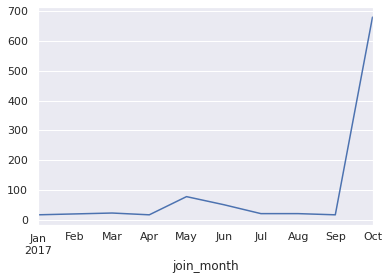

In [69]:
transactions.groupby('join_month')['uid'].count().plot(kind = 'line');

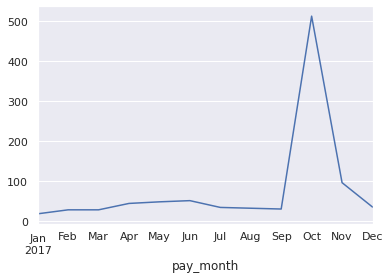

In [70]:
transactions.groupby('pay_month')['uid'].count().plot(kind = 'line');

Теперь более уверенно можем предположить о рекламной кампании в мае и ноябре. Кол-во платежей резко растет, но среденее плюс-минус в норме

### Разбираемся на кого нововведение могло оказать большее влияние, попробую выяснить через разность медиан тествой и контр группы в разрезе разных переменных
* Посчитаем по product_type
* country
* from_page

In [71]:
# считаем разницу медиан контрольной и тестовой группы 
median_diff = transactions.query('group == "test"')['revenue'].median() - \
          transactions.query('group == "control"')['revenue'].median()
mean_diff = transactions.query('group == "test"')['revenue'].mean() - \
          transactions.query('group == "control"')['revenue'].mean()
print(median)
print(mean)

1040.0
2209.101189884327


In [72]:
# еще раз посчитаем кол-во транзакций по странам чтобы высоко не листать :)
trans_num_test_country = transactions.query('group == "test"')['country'].value_counts()
trans_num_test_country

United States of America          94
France                            34
Spain                             25
Italy                             20
Israel                            15
Chile                             12
United Kingdom (Great Britain)    12
United Arab Emirates              12
Canada                            11
Argentina                         10
Germany                            8
Belgium                            6
Switzerland                        5
Turkey                             2
Australia                          1
Name: country, dtype: int64

In [73]:
# Считаем медиану
median_country = transactions.query('group == "test"').groupby('country')['revenue'].median() - \
                 transactions.query('group == "control"').groupby('country')['revenue'].median()
print(median_country)

country
Argentina                         6890.0
Australia                         7878.0
Belgium                           6305.0
Canada                           -2710.5
Chile                             -234.0
France                            2788.5
Germany                           3653.0
Israel                           -1430.0
Italy                             1332.5
Spain                                0.0
Switzerland                      -4036.5
Turkey                            1534.0
United Arab Emirates              3614.0
United Kingdom (Great Britain)   -1007.5
United States of America          3367.0
Name: revenue, dtype: float64


In [74]:
# Считаем средние
mean_country = transactions.query('group == "test"').groupby('country')['revenue'].mean() - \
               transactions.query('group == "control"').groupby('country')['revenue'].mean()
print(mean_country)

country
Argentina                         13025.660870
Australia                          5772.000000
Belgium                            1789.666667
Canada                             -359.863636
Chile                              -235.784314
France                             3378.075901
Germany                            5197.214286
Israel                             1860.671429
Italy                             -1931.648990
Spain                              3908.453333
Switzerland                       -2381.925000
Turkey                            -4555.200000
United Arab Emirates               7110.638889
United Kingdom (Great Britain)      539.240000
United States of America           1414.231433
Name: revenue, dtype: float64


In [136]:
#сделаем отдельно датафрем со странами где больше всего выросли платежи и платежей > 10
top_countries_list = ['Argentina', 'United States of America', 'France', 'Italy', \
                      'United Arab Emirates', 'Argentina']
full_top_countries = full.query('country.isin(@top_countries_list) and revenue > 0')
full_top_countries.head()

,country,uid,age,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,...,age_bin,joined_at,paid_at,revenue,payment_id,from_page,product_type,pay_month,join_month,paid
108,United States of America,892380033,29,535,0.0,1234567891011121314151617181920212223242526272...,1,25,31,142,...,3.0,2017-10-15 09:11:00,2017-10-15 09:23:00,4732.0,147.0,left_sidebar_menu,premium_no_trial,2017-10-01,2017-10-01,yes
175,Italy,891292845,22,0,0.0,0,1,19,40,0,...,3.0,2017-06-11 03:51:00,2017-06-11 03:59:00,1898.0,68.0,none,premium_no_trial,2017-06-01,2017-06-01,yes
182,United States of America,892336797,24,255,0.0,167910111314,1,21,27,43,...,3.0,2017-10-16 00:21:00,2017-10-16 00:51:00,6292.0,147.0,send_message,premium_no_trial,2017-10-01,2017-10-01,yes
188,United States of America,891264903,19,239,0.0,23456789,1,16,22,46,...,2.0,2017-06-11 16:02:00,2017-08-11 22:32:00,3887.0,147.0,none,premium_no_trial,2017-08-01,2017-06-01,yes
189,United States of America,891264903,19,239,0.0,23456789,1,16,22,46,...,2.0,2017-06-11 16:02:00,2017-09-11 10:32:00,3874.0,147.0,none,premium_no_trial,2017-09-01,2017-06-01,yes


#### Список стран и разницы в медианных платежах. Во многих странах большой прирост учитывая среднюю разницу в 1040.
#### Отберем страны для того, чтобы рассмотреть поближе. Критерии: 10 или больше платежей в тест группе(на маленьком кол-ве платежей могут быть любые цифры), 
#### Развдуем страны поближе, начнем с Аргентины

In [75]:
# разведуем по странам поближе
argentina_from = transactions.query('country == "Argentina"') \
                             .groupby(['group','from_page'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
argentina_from

,group,from_page,count,mean,median
0,control,autorefill,8,3783.000000,3783.0
1,control,autoreply_message,2,5785.000000,5785.0
2,control,empty_likes,14,3771.857143,3965.0
3,control,left_sidebar_menu,3,5949.666667,6292.0
4,control,menu,3,1261.000000,1261.0
5,control,none,2,10413.000000,10413.0
6,control,popular_users_block,2,5785.000000,5785.0
7,control,promo_09,3,6292.000000,6292.0
8,control,trial_vip_popup,9,10907.000000,10569.0
9,test,autoreply_message,3,8073.000000,6292.0


In [76]:
argentina_prod_type = transactions.query('country == "Argentina"') \
                                  .groupby(['group','product_type'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
argentina_prod_type

,group,product_type,count,mean,median
0,control,coins,25,3474.12,1261.0
1,control,premium_no_trial,12,6724.25,6292.0
2,control,trial_premium,9,10907.00,10569.0
3,test,coins,3,31525.00,31525.0
4,test,other_type,1,30264.00,30264.0
5,test,premium_no_trial,5,9882.60,12597.0
6,test,trial_premium,1,13767.00,13767.0


Мало данных, трудно что-то сказать. Стоит обратить внимание на рост coins в 10 раз (хоть всего и 3 платежа) и premium_no_trial рост в 2 раза по медиане и выборки чуть более схожи

In [77]:
usa_from = transactions.query('country == "United States of America"') \
                                 .groupby(['group','from_page'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
usa_from

,group,from_page,count,mean,median
0,control,ad_to_photo,2,1053.000000,1053.0
1,control,admins,1,1625.000000,1625.0
2,control,autorefill,8,3152.500000,1261.0
3,control,autoreply_message,21,9258.476190,6292.0
4,control,dating,8,9421.750000,10913.5
5,control,empty_likes,70,3442.771429,2730.0
6,control,gifts,4,2281.500000,1813.5
7,control,left_sidebar_menu,9,5224.555556,4732.0
8,control,menu,11,3668.363636,3783.0
9,control,none,13,4661.000000,3692.0


Обращаем внимание только на >5 платежей. 
* empty_likes - идентинчо по медиане, средний чек подрос. 
* menu - та же история
* promo_09 - наоброт. по средним пхоже, по медиане в test выше
* trial_vip_popup - так же как и promo_09

In [78]:
usa_prod_type = transactions.query('country == "United States of America"') \
                                  .groupby(['group','product_type'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
usa_prod_type

,group,product_type,count,mean,median
0,control,coins,76,3547.973684,1261.0
1,control,other_type,25,4198.480000,3692.0
2,control,premium_no_trial,62,6907.822581,4998.5
3,control,trial_premium,49,10719.693878,9789.0
4,test,coins,39,5962.333333,3952.0
5,test,other_type,11,3527.727273,3783.0
6,test,premium_no_trial,20,8287.500000,9100.0
7,test,trial_premium,24,11864.666667,12727.0


Тут больше информации и можно уверенее о чем-либо говорить
* везде, кроме, other_type большой рост и по среднему и медиане
* особенно обращаем внимание на coins и premium_no_trial

In [79]:
france_from = transactions.query('country == "France"') \
                                 .groupby(['group','from_page'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
france_from

,group,from_page,count,mean,median
0,control,ad_to_photo,1,728.000000,728.0
1,control,admins,1,2314.000000,2314.0
2,control,autorefill,1,1261.000000,1261.0
3,control,autoreply_message,6,6376.500000,6402.5
4,control,empty_likes,18,2535.722222,1787.5
5,control,left_sidebar_menu,1,6292.000000,6292.0
6,control,menu,2,3107.000000,3107.0
7,control,none,15,3109.600000,2834.0
8,control,popular_users_chat,1,6448.000000,6448.0
9,control,promo_09,4,6318.000000,6318.0


In [80]:
france_prod_type = transactions.query('country == "France"') \
                                  .groupby(['group','product_type'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
france_prod_type

,group,product_type,count,mean,median
0,control,coins,23,2346.782609,1261.0
1,control,other_type,7,2668.714286,2314.0
2,control,premium_no_trial,21,5367.142857,6292.0
3,control,trial_premium,11,13459.727273,12714.0
4,test,coins,15,3510.000000,2418.0
5,test,other_type,4,16009.500000,8820.5
6,test,premium_no_trial,6,6677.666667,7098.0
7,test,trial_premium,9,15660.666667,16471.0


* Рост other_type, но очень мало данных, поэтому не интересует
* Рост в coins в 2 раза по медиане

In [81]:
uae_from = transactions.query('country == "United Arab Emirates"') \
                                 .groupby(['group','from_page'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
uae_from

,group,from_page,count,mean,median
0,control,ad_to_photo,1,3783.000000,3783.0
1,control,autoreply_message,2,9769.500000,9769.5
2,control,dating,2,9769.500000,9769.5
3,control,empty_likes,6,4511.000000,3666.0
4,control,left_sidebar_menu,3,31000.666667,6292.0
5,control,none,1,4537.000000,4537.0
6,control,promo_09,1,4914.000000,4914.0
7,control,trial_vip_popup,2,10153.000000,10153.0
8,test,autoreply_message,3,42362.666667,8697.0
9,test,empty_likes,2,5044.000000,5044.0


In [82]:
uae_prod_type = transactions.query('country == "United Arab Emirates"') \
                                  .groupby(['group','product_type'])['revenue'].agg(['count', 'mean', 'median']).reset_index()
uae_prod_type

,group,product_type,count,mean,median
0,control,coins,5,4867.200000,4602.0
1,control,other_type,2,3256.500000,3256.5
2,control,premium_no_trial,7,16433.857143,6292.0
3,control,trial_premium,4,11700.000000,11700.0
4,test,coins,1,6305.000000,6305.0
5,test,other_type,1,3783.000000,3783.0
6,test,premium_no_trial,7,23422.285714,9217.0
7,test,trial_premium,3,13247.000000,13247.0


Посмотрим медиану в разрезе product_type и from_page

In [83]:
median_prod_type = transactions.query('group == "test"').groupby('product_type')['revenue'].median() - \
                   transactions.query('group == "control"').groupby('product_type')['revenue'].median()
print(median_prod_type)

product_type
coins                819.0
other_type          -552.5
premium_no_trial    1813.5
trial_premium         71.5
Name: revenue, dtype: float64


Большой рост в premium_no_trial

In [84]:
group_page = transactions.groupby(['group', 'from_page'])['revenue'].describe().reset_index()


In [85]:
median_from_page = transactions.query('group == "test"').groupby('from_page')['revenue'].median() - \
                   transactions.query('group == "control"').groupby('from_page')['revenue'].median()
print(median_from_page)

from_page
ad_to_photo             -520.0
admins                     NaN
autorefill              5044.0
autoreply_message       1833.0
coins_popup            42614.0
dating                  6305.0
delivery_vip               NaN
empty_admins               NaN
empty_likes              864.5
empty_mutual            1456.0
fans                    1306.5
gifts                   2197.0
left_sidebar_menu          0.0
likes                      NaN
menu                       0.0
no_sympathy                NaN
none                    -344.5
popular_users_block     4615.0
popular_users_chat      3445.0
promo_09                4615.0
send_message            6305.0
super_popup             3789.5
sympathy                1124.5
trial_vip_popup         2054.0
user_profile            8885.5
Name: revenue, dtype: float64


In [86]:
group_page

,group,from_page,count,mean,std,min,25%,50%,75%,max
0,control,ad_to_photo,8.0,1706.250000,1126.106408,507.0,815.75,1417.0,2421.25,3783.0
1,control,admins,2.0,1969.500000,487.196572,1625.0,1797.25,1969.5,2141.75,2314.0
2,control,autorefill,43.0,3724.348837,2551.157038,1261.0,1261.00,1261.0,6305.00,6305.0
3,control,autoreply_message,52.0,9151.250000,11295.802547,3601.0,6292.00,6292.0,6438.25,63037.0
4,control,coins_popup,2.0,1469.000000,0.000000,1469.0,1469.00,1469.0,1469.00,1469.0
5,control,dating,18.0,8439.888889,3326.830498,4537.0,6292.00,6292.0,12727.00,13247.0
6,control,empty_admins,5.0,3783.000000,0.000000,3783.0,3783.00,3783.0,3783.00,3783.0
7,control,empty_likes,196.0,3423.045918,2689.444158,689.0,1261.00,2730.0,4602.00,19513.0
8,control,empty_mutual,1.0,2327.000000,NaN,2327.0,2327.00,2327.0,2327.00,2327.0
9,control,fans,11.0,8502.000000,11519.619751,767.0,2255.50,3783.0,6292.00,31525.0


* 1 платеж в test coins_popup в 44083
* в autorefill рост на 5044.0, но в тест всего 5 платежей
* в dating та же ситуация
* в empty_mutuals,fans, gifts,popular_users_block, send_message, super_popup, sympathy, user_profile меньше 5 платежей и трудно четко оценить эффект
* в popular_users_chat рост на 3445
* в promo_09 рост на 4615.0
* в trial_vip_popup рост на 2054.0
* учитываем среднюю разницу медианы  в 4107.0

## Считаем метрики
* ARPU
* ARPAU
* MEDIAN
* MEDIAN DIFF

Для этого сразу объединим users и transactions

In [87]:
# переводим uid в int, тк не сходяться dtypes
transactions['uid'] = transactions['uid'].astype(int)
full = users.merge(transactions, on = ('uid', 'country', 'group'), how = 'left')
full.head()

,country,uid,age,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,...,tot_days,age_bin,joined_at,paid_at,revenue,payment_id,from_page,product_type,pay_month,join_month
0,United States of America,892319115,25,435,0.0,123456,0,22,32,982,...,6.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
1,United States of America,891248523,29,500,0.0,12,1,26,32,12,...,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
2,France,891670932,33,800,0.0,1235689111316,1,30,36,5,...,13.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
3,Argentina,891060786,26,0,0.0,12345,1,23,29,0,...,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT
4,United States of America,892006554,35,294,0.0,12356789101215161719,1,30,40,17,...,20.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT


In [88]:
# проверим корректен ли мердж по uid
full.query('uid == 891319275')

,country,uid,age,attraction_coeff,coins,visit_days,gender,age_filter_start,age_filter_end,views_count,...,tot_days,age_bin,joined_at,paid_at,revenue,payment_id,from_page,product_type,pay_month,join_month
2668,France,891319275,27,0,0.0,123,1,24,30,2,...,3.0,3.0,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium,2017-12-01,2017-05-01
2669,France,891319275,27,0,0.0,123,1,24,30,2,...,3.0,3.0,2017-05-11 19:57:00,2017-05-11 20:05:00,728.0,146.0,ad_to_photo,coins,2017-05-01,2017-05-01


In [89]:
transactions.query('uid == 891319275')

,country,uid,joined_at,paid_at,revenue,payment_id,from_page,product_type,group,pay_month,join_month
0,France,891319275,2017-05-11 19:57:00,2017-12-11 21:57:00,12727.0,147.0,trial_vip_popup,trial_premium,control,2017-12-01,2017-05-01
337,France,891319275,2017-05-11 19:57:00,2017-05-11 20:05:00,728.0,146.0,ad_to_photo,coins,control,2017-05-01,2017-05-01


In [90]:
arpu_control = full.query('group == "control"')['revenue'].sum() \
                / full.query('group == "control"')['uid'].nunique()
arpu_test = full.query('group == "test"')['revenue'].sum() \
                / full.query('group == "test"')['uid'].nunique()
print(arpu_control)
print(arpu_test)
print(arpu_test - arpu_control)

514.6599836810817
542.7939393939394
28.13395571285764


In [91]:
#arpau удобнее считать просто по колонке транзакций
arpau_control = transactions.query('group == "control"')['revenue'].sum() \
                / transactions.query('group == "control"')['uid'].nunique()
arpau_test = transactions.query('group == "test"')['revenue'].sum() \
                / transactions.query('group == "test"')['uid'].nunique()
print(arpau_control)
print(arpau_test)
print(arpau_test - arpau_control)

12063.573770491803
16170.736111111111
4107.162340619308


In [92]:
median_test = transactions.query('group == "test"')['revenue'].median()
median_control = transactions.query('group == "control"')['revenue'].median()
print(median_test)
print(median_control)
print(median_test - median_control)


6305.0
5265.0
1040.0


In [93]:
conversion_test = transactions.query('group == "test" and revenue > 0')['uid'].nunique()\
/users.query('group == "test"')['uid'].nunique()*100

In [94]:
conversion_control = transactions.query('group == "control" and revenue > 0')['uid'].nunique()\
/users.query('group == "control"')['uid'].nunique()*100


In [95]:
print(conversion_test)
print(conversion_control)
print(conversion_test - conversion_control)


3.3566433566433567
4.266231495512297
-0.9095881388689406


Сделаем номинативную переменную платежей, построим кросстаб и посморим статзначимость наших различий


In [96]:
# убираем образовавшиеся при мердже NaN
full['revenue'] = full['revenue'].fillna(0)
#функция для создания номинативной переменной платежей. Yes - оплатил, NO - не оплатил
def paid_func(full): 
    if (full['revenue'] == 0):
        return 'no'
    else:
        return 'yes'
# применим функцию на колонку
full['paid'] = full.apply(paid_func, axis = 1)

In [97]:
# сделаем датафрейм где уберем дубликаты по uid, тк они помешают точно посчитать конверсию
full_drop = full.drop_duplicates(subset='uid', keep="last")

In [98]:
# создаем нормализованый кросстаб чтобы узнать проценты конверсии в группах 
cross_norm = pd.crosstab(full_drop.group, full_drop.paid, normalize = 'index').style.format('{:.2%}')
cross_norm

paid,no,yes
group,,
control,95.73%,4.27%
test,96.64%,3.36%


In [99]:
#кросстаб в абсолюных числах
cross = pd.crosstab(full_drop.group, full_drop.paid) 
cross

paid,no,yes
group,,
control,8213,366
test,4146,144


Конверсия control = 4,27%, test = 3,36%

## Посчитаем стат значимость этих различий
* Для двух номинативных переменных будем использовать критерий хи-квадрат
* Выдвигаем Н0 - конверсия в группах control и test статистически значимо не различается
* Отвергаем при p-value < 0.05

In [105]:
from scipy.stats import chi2_contingency
stat, p, dof, expected  = chi2_contingency(cross) #критерий хи-квадрат
print(f'P-value по хи-квадрат = {p}')

P-value по хи-квадрат = 0.014467199492552284


P-value - менее 5 процентов, поэтому отвеграем Н0 и считаем что конверсии в группах статзначимо различаются. P-value в 0,014 значит что наше различие могло случайно получиться только в 1,5 процентов случаев из 100

________
# Статзначимость различий по revenue

In [101]:
# выведем кол-во наблюдений в наших группах
print(transactions.query('group == "test"').uid.count())
print(transactions.query('group == "control"').uid.count())

267
678


### Выбираем метод
* T-Test фейлится из-за выбросов, а они у нас есть в контрольной группе и результат может ввести нас в заблуждение. Можно прологарифмировать, но тогда не сможем сделать внятных выводов(ttest сравнивает по средним, но после логарифмирования сможем сделать вывод о логарифмированых данных, а не реальных). Просто проведем shapiro на нормальность распределения, чтобы точно отмести ttest. 
* Хотя непараметрика (манна-уитни) нормально работает с ассимеричными данными, он плохо работает с большим кол-вом повторяющихся значений. Также по непараметрике очень сложно сделать конкретные выводы, тк она сравнивает ранги значений. Тоже не идеальный вариант
* Bootstrap позволяет понять где различия в группах (медиана, процентили). Для нас это будет лучший вариант

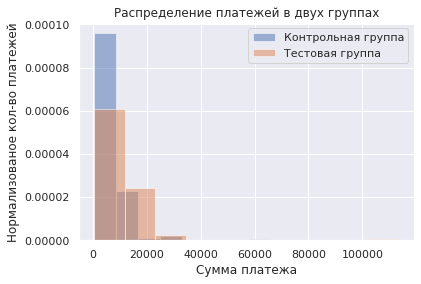

In [102]:
#смортим распределение платежей 
fix, ax = plt.subplots() 
ax.hist(transactions.query('group == "control"')['revenue'], \
        label = 'Контрольная группа', alpha = 0.5, density=True) #step - thin lines
ax.hist(transactions.query('group == "test"')['revenue'], \
        label = 'Тестовая группа', alpha = 0.5, density=True)
ax.set_title('Распределение платежей в двух группах')
ax.set_ylabel('Нормализованое кол-во платежей')
ax.set_xlabel('Сумма платежа')
ax.legend()
plt.show()

In [103]:
# функция для бутстрапа и постройки графика
from tqdm.auto import tqdm
from scipy.stats import norm
def get_bootstrap( # создаем функцию для бутстрапа
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, # чтобы сохранить дисперсию, берем такой же размер выборки
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2)) 
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

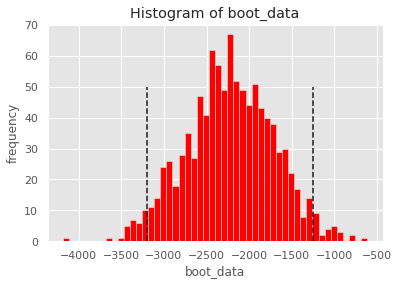

{'quants':                  0
 0.025 -3204.857117
 0.975 -1252.521239,
 'p_value': 1.2928362842225704e-05}

In [132]:
# бутсрапируем оригинальные данные
get_bootstrap(
    transactions.query('group == "control"')['revenue'] , # числовые значения первой выборки
    transactions.query('group == "test"')['revenue'], # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)


Так как мы делаем вычитание бутстрапированых данных групп test и control и наш график не задевает 0, значит мы получили статзначимое различие. Также p-value намного меньше 0.05. Это позволяет отвергнуть Н0 и принять Н1 о том, что медианы платжей контрольной и тестовой группы статзначимо различа

# Вывод:
* Конверсия в тестовой группе статзначимо снизилась на 1%
* Платежи в тестовой группе стали статзначимо выше
* Это результат который мы могли ожидать от изменения стоимости премиум-подписки 
    * Чуть меньше людей берут подписку
    * Те, кто ее берет приносит больше денег как за подписку, так и за внутенние транзакции
* Платежи в тестовой группе выросли не во всех странах, поэтому нужно подумать над актуальностью раскатывания ее прямо на все страны


_______
## Полезные ссылки из анализа
* median_diff - разница медиан ревенью контр и тест групп
* mean_diff - разница средних ревенью контр и тест групп
* median_country - разница медиан ревенью контр и тест групп в разрезе стран
* mean_country - разница средних ревенью контр и тест групп в разрезе стран
* Статистика ревенью конкретных стран в разрезе prod_type и from_page
    * argentina_from - Аргентина 
    * argentina_prod_type
    * usa_from - США
    * usa_prod_type
    * france_from - Франция 
    * france_prod_type
    * uae_from - Объед Эмираты
    * uae_prod_type
* median_prod_type - разница медиан ревенью контр и тест групп в разрезе prod_type
* median_from_page - разница медиан ревенью контр и тест групп в разрезе from_page
* arpu_control 
* arpu_test
* arpau_control
* arpau_test
* median_control
* median_test
* cross_norm - нормализованая кросстаблица где можно смотреть конверсию
